### A must needed concept

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.dpi'] = 200

In [76]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [26]:
Counter(num_friends)

Counter({100: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

In [23]:
import numpy as np
ys = [friends_count[x] for x in xs]
np.transpose(ys)

array([ 0, 22, 17, 20, 20, 17, 22, 15, 13, 18, 15,  1,  2,  4,  2,  4,  1,
        0,  2,  2,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1])

In [33]:
import statistics

statistics.mode(num_friends)

6

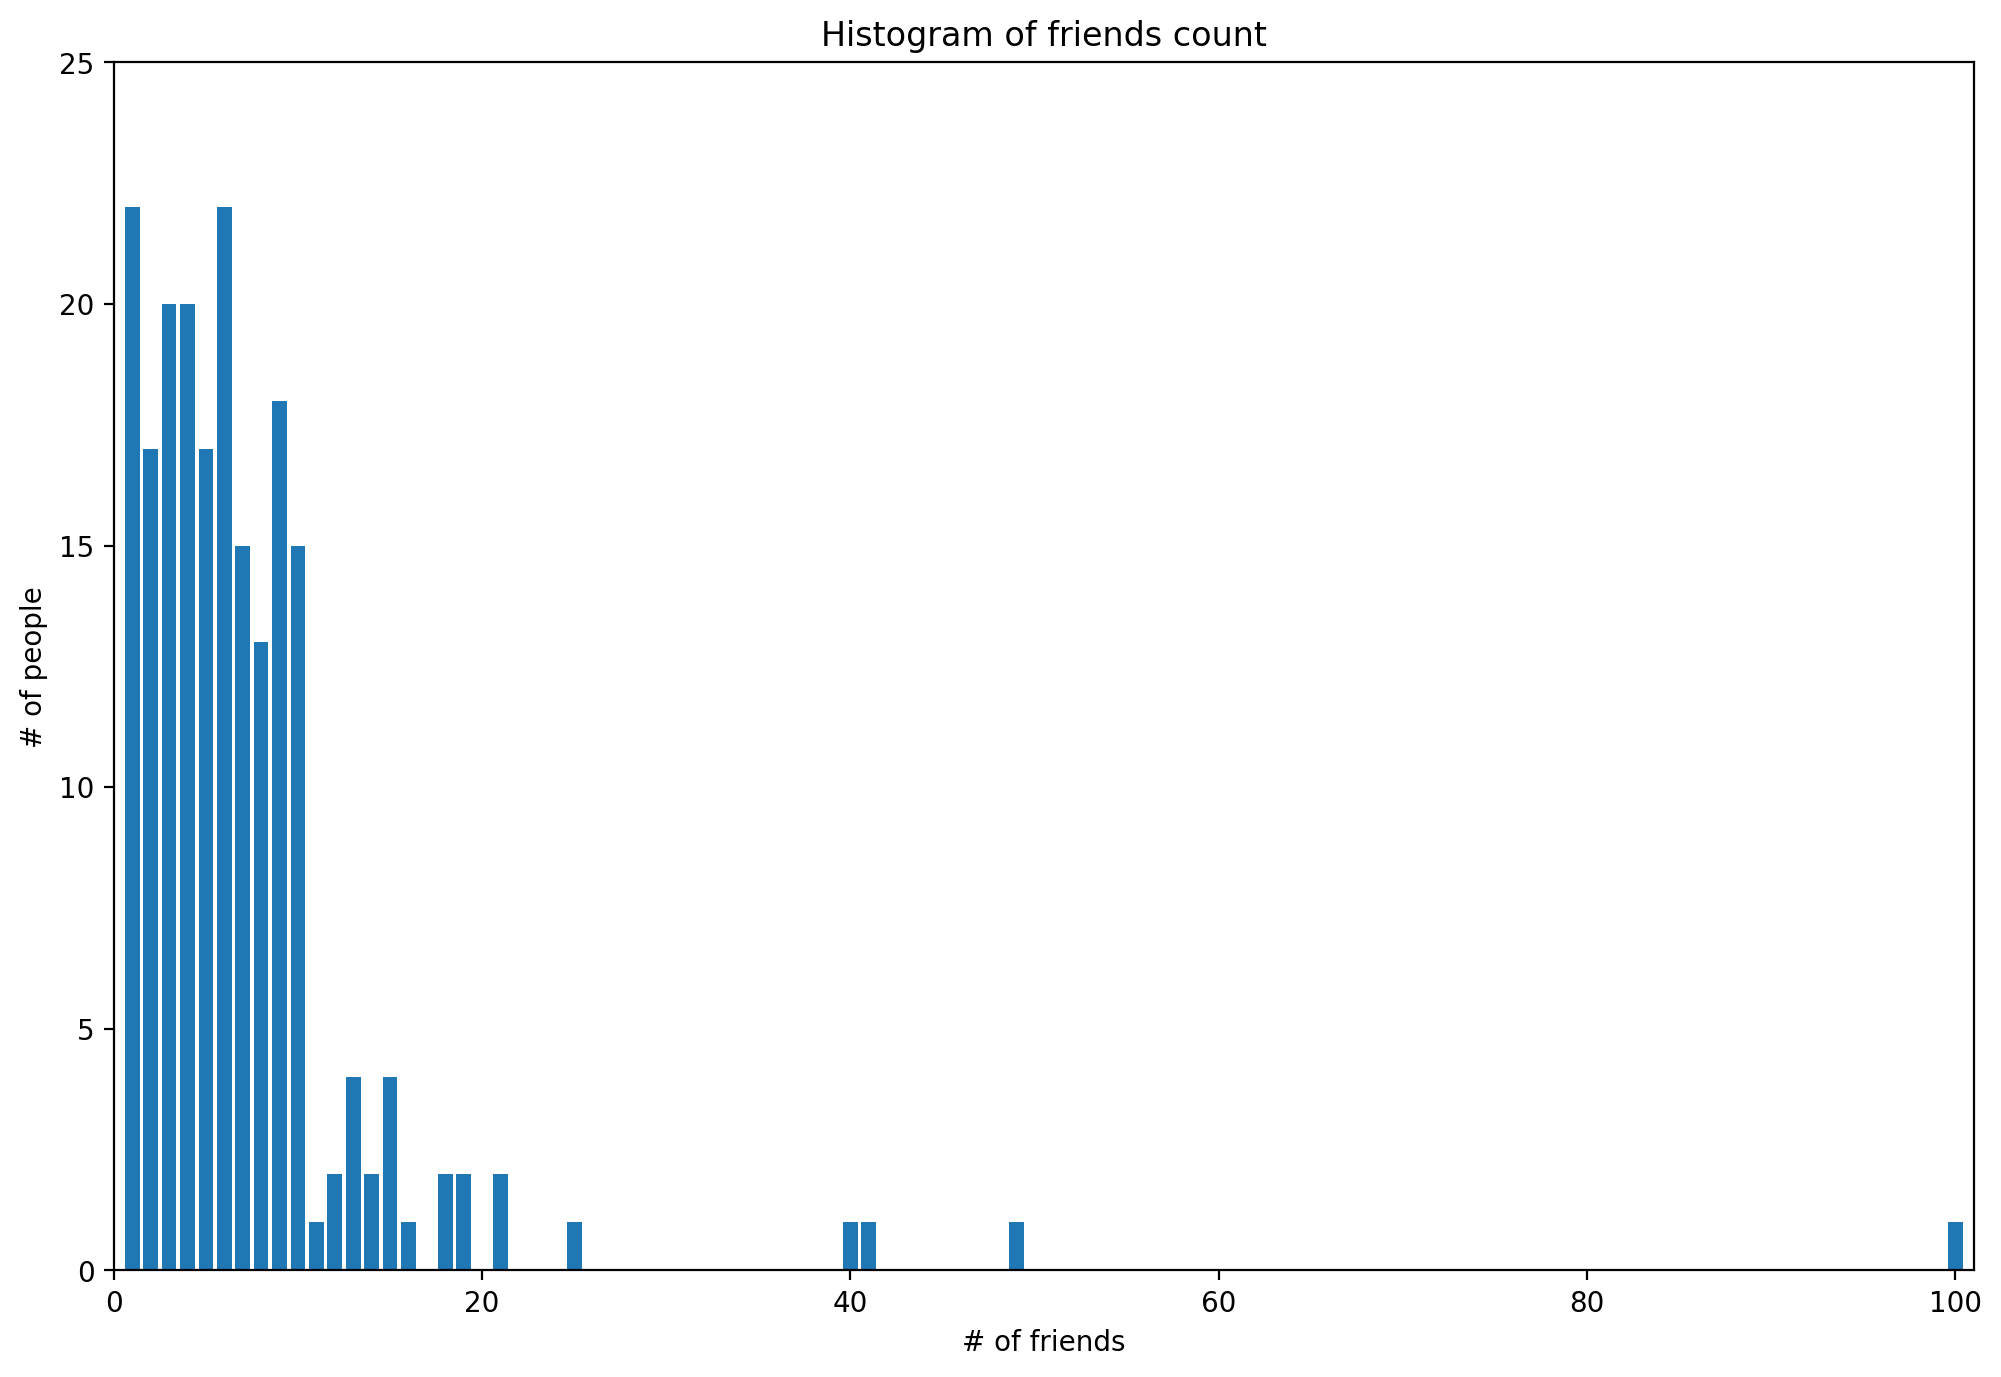

In [34]:
from collections import Counter
import matplotlib.pyplot as plt

friends_count = Counter(num_friends)
xs = range(101)
ys = [friends_count[x] for x in xs]   #number of friends

plt.bar(xs,ys)
plt.title("Histogram of friends count")
plt.axis([0,101,0,25])
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.axis('equal')
plt.show()

To make it more communicable, we will simplify some elements

In [35]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

num_points, largest_value, smallest_value

(204, 100, 1)

In [36]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

smallest_value, second_smallest_value, second_largest_value

(1, 1, 49)

In [37]:
def mean(xs):
    return sum(xs)/len(xs)


mean(num_friends)

7.333333333333333

In [38]:
'''
We will also be interested in media of data set 
We know that if the len(xs) is odd, median is simply middle element,
else sum of elements when even
'''

def _median_odd(xs):
    return sorted(xs)[len(xs) // 2]

def _median_even(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    return (sorted_xs[midpoint-1] + sorted_xs[midpoint])/2

def median(v):
    return (_median_even(v) if len(v) % 2 == 0 else _median_odd(v))

assert median([1,10,2,9,5]) == 5
assert median([1,9,2,10]) == (2+9)/2 



# testing the code
print(median(num_friends))

6.0


In [39]:
np.median(num_friends)

6.0

##### If we have $n$ data points and one of them increases by some small quantity $e$, then necessarily the mean will increase by $e/n$

<font color = 'darkpink'>The generalisation of the median is the **quantile**, which means the value under which a certain percentile of the data lies( the median represents the value under which $50\%$ of the data lies)

## Quantiles

In [40]:
def quantile(xs, p):
# p is the p-th percentile value in x
    p_index = int(p* len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

print(quantile(num_friends, 0.6))

7


In [47]:
np.quantile(num_friends, 0.5)

# 50th percentile or 2nd quantile is the median of the dataset

6.0

## Mode
Most commonly occuring value

In [41]:
def mode(x):
    
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

assert set(mode(num_friends)) == {1,6}

print(mode(num_friends))

[6, 1]


## Dispersion 
Dispersion talks of the spread of the data i.e. how far the data is spread.<br>
Range in statistics mean difference between largest and smallest number.<br>

<font color = 'indigo'> Variance is a complex measure of dispersion

In [42]:
def _range(xs):
    return max(xs) - min(xs)

print(_range(num_friends))

99


In [48]:
import numpy as np

variance_value = np.var(num_friends)
standard_deviation = np.std(num_friends)

variance_value, standard_deviation

(81.14379084967321, 9.007984838446012)

## <font color = 'aqua'> Correlation
For correlation, we deal with $covariance$ - paired analogue of variance. <br>
Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.

Recall that **dot** sums up the products of corresponding pairs of elements. When corresponding elements of and are either both above their means
or both below their means, a positive number enters the sum. When one is above its mean and the other below, a negative number enters the sum.
<br>Accordingly, a **“large” positive covariance** means that $x$ tends to be large when $y$ is large and small when $y$ is small. A “large” negative covariance means the opposite—that $x$ tends to be small when $y$ is large and vice versa. A covariance close to zero means that no such relationship exists.

<font color = 'teal'> <br>Correlation is unitless and always lies between –1 (perfect anticorrelation) and 1 (perfect correlation). Outliers are very sensitive to correlations.

In [73]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [77]:
matrix = np.corrcoef(num_friends, daily_minutes)
matrix

array([[1.        , 0.24736957],
       [0.24736957, 1.        ]])

<font color = 'darkorange'> There is a positive correlation between number of friens online and daily hours spent online. The correlation is not strong tho<br>
  `But at same time notice that if we remove the outliers, the correlation increase steeply`

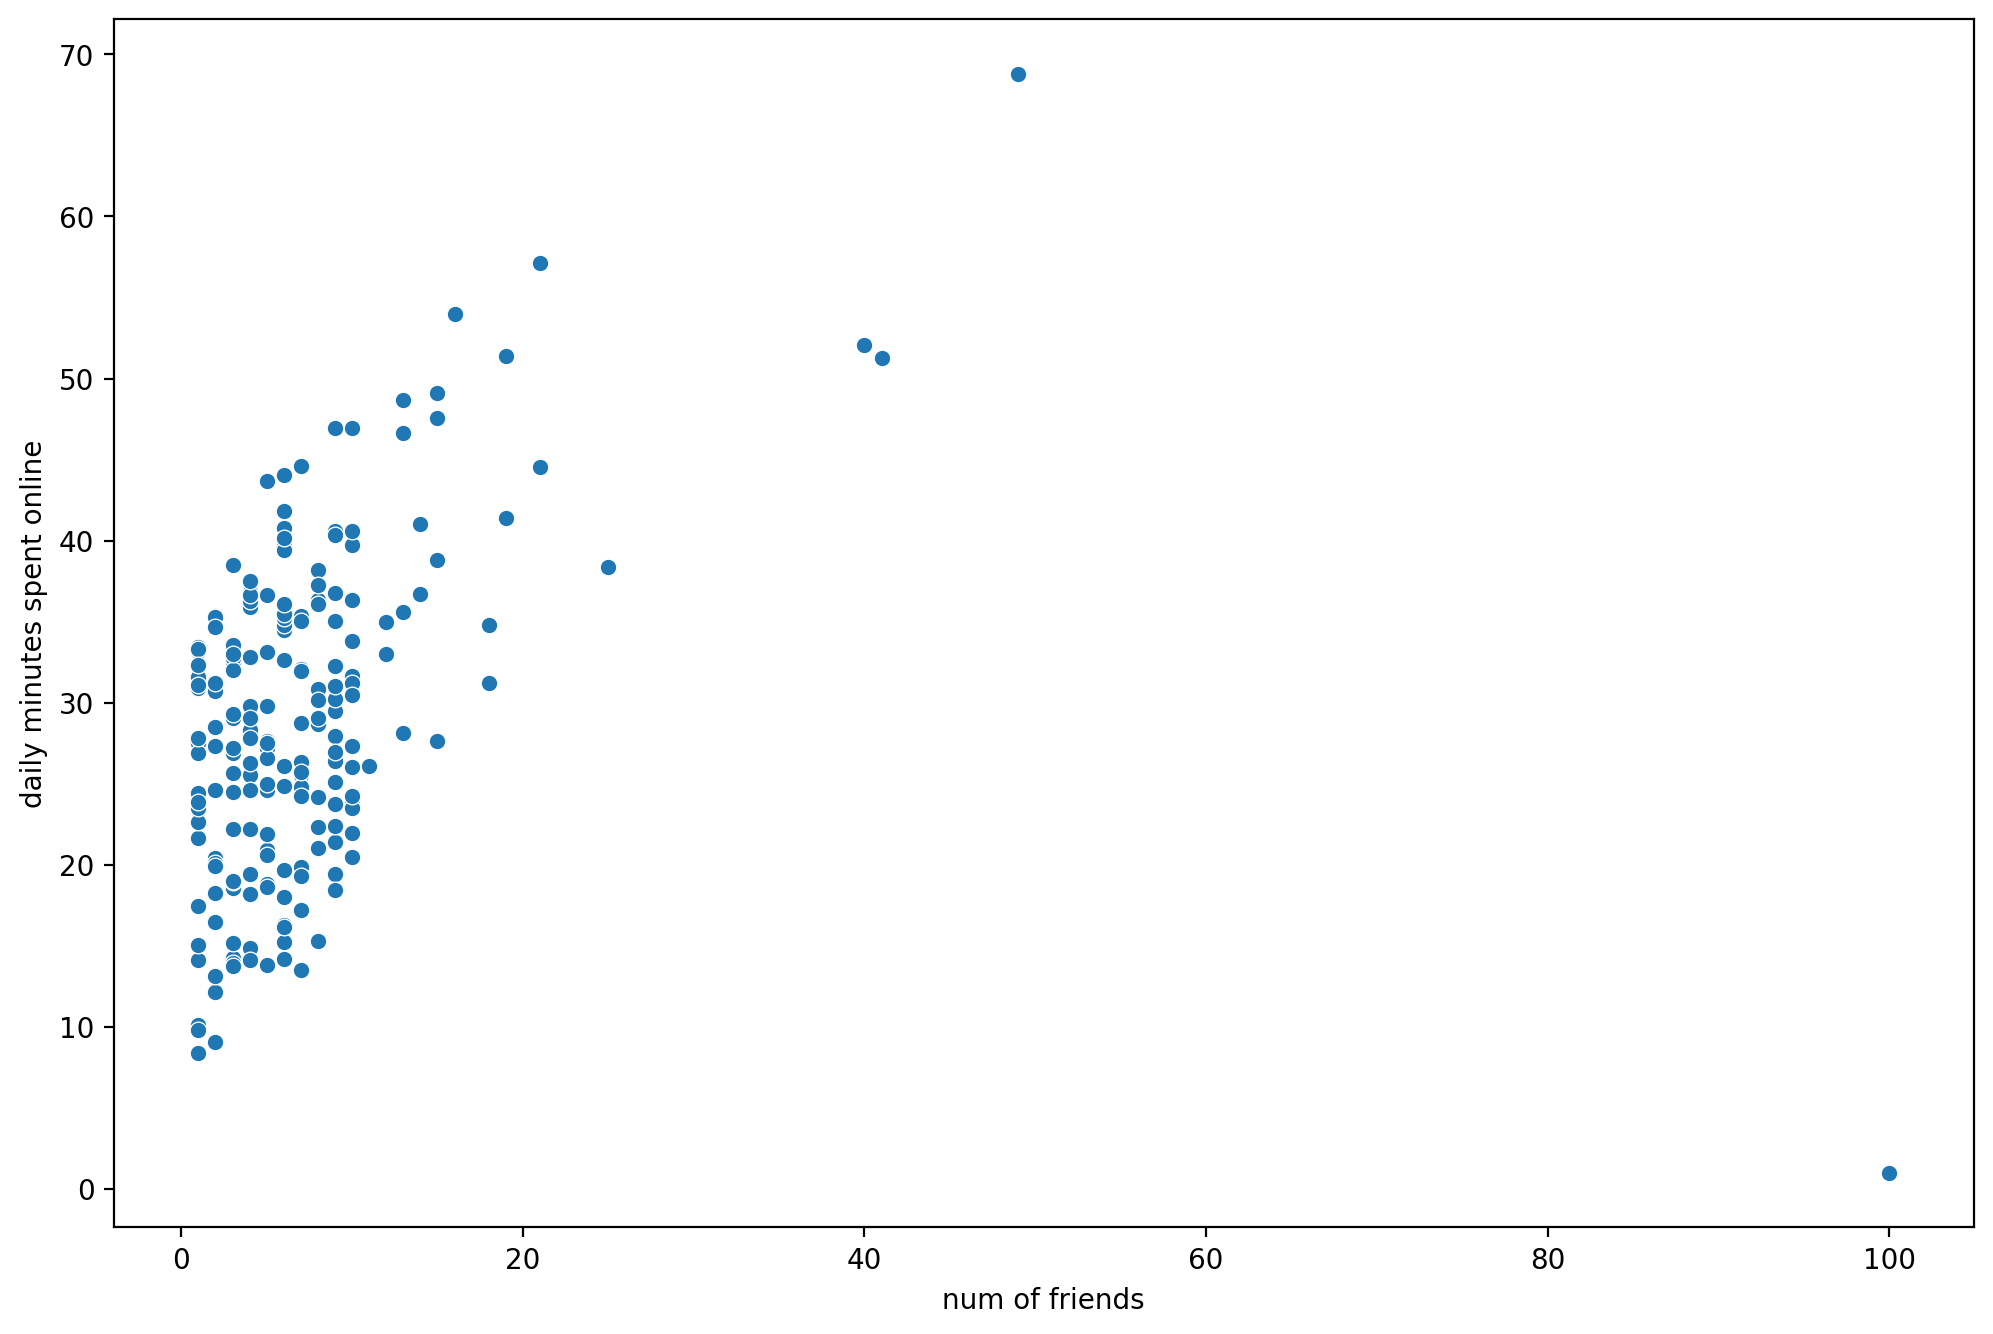

In [78]:
ax = sns.scatterplot(x=num_friends, y = daily_minutes)
ax.set(xlabel = 'num of friends', ylabel = 'daily minutes spent online')
plt.show()

In [83]:
num_friends.index(100)

0

In [84]:
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]


In [85]:
np.corrcoef(num_friends_good, daily_hours_good)

array([[1.        , 0.57367921],
       [0.57367921, 1.        ]])

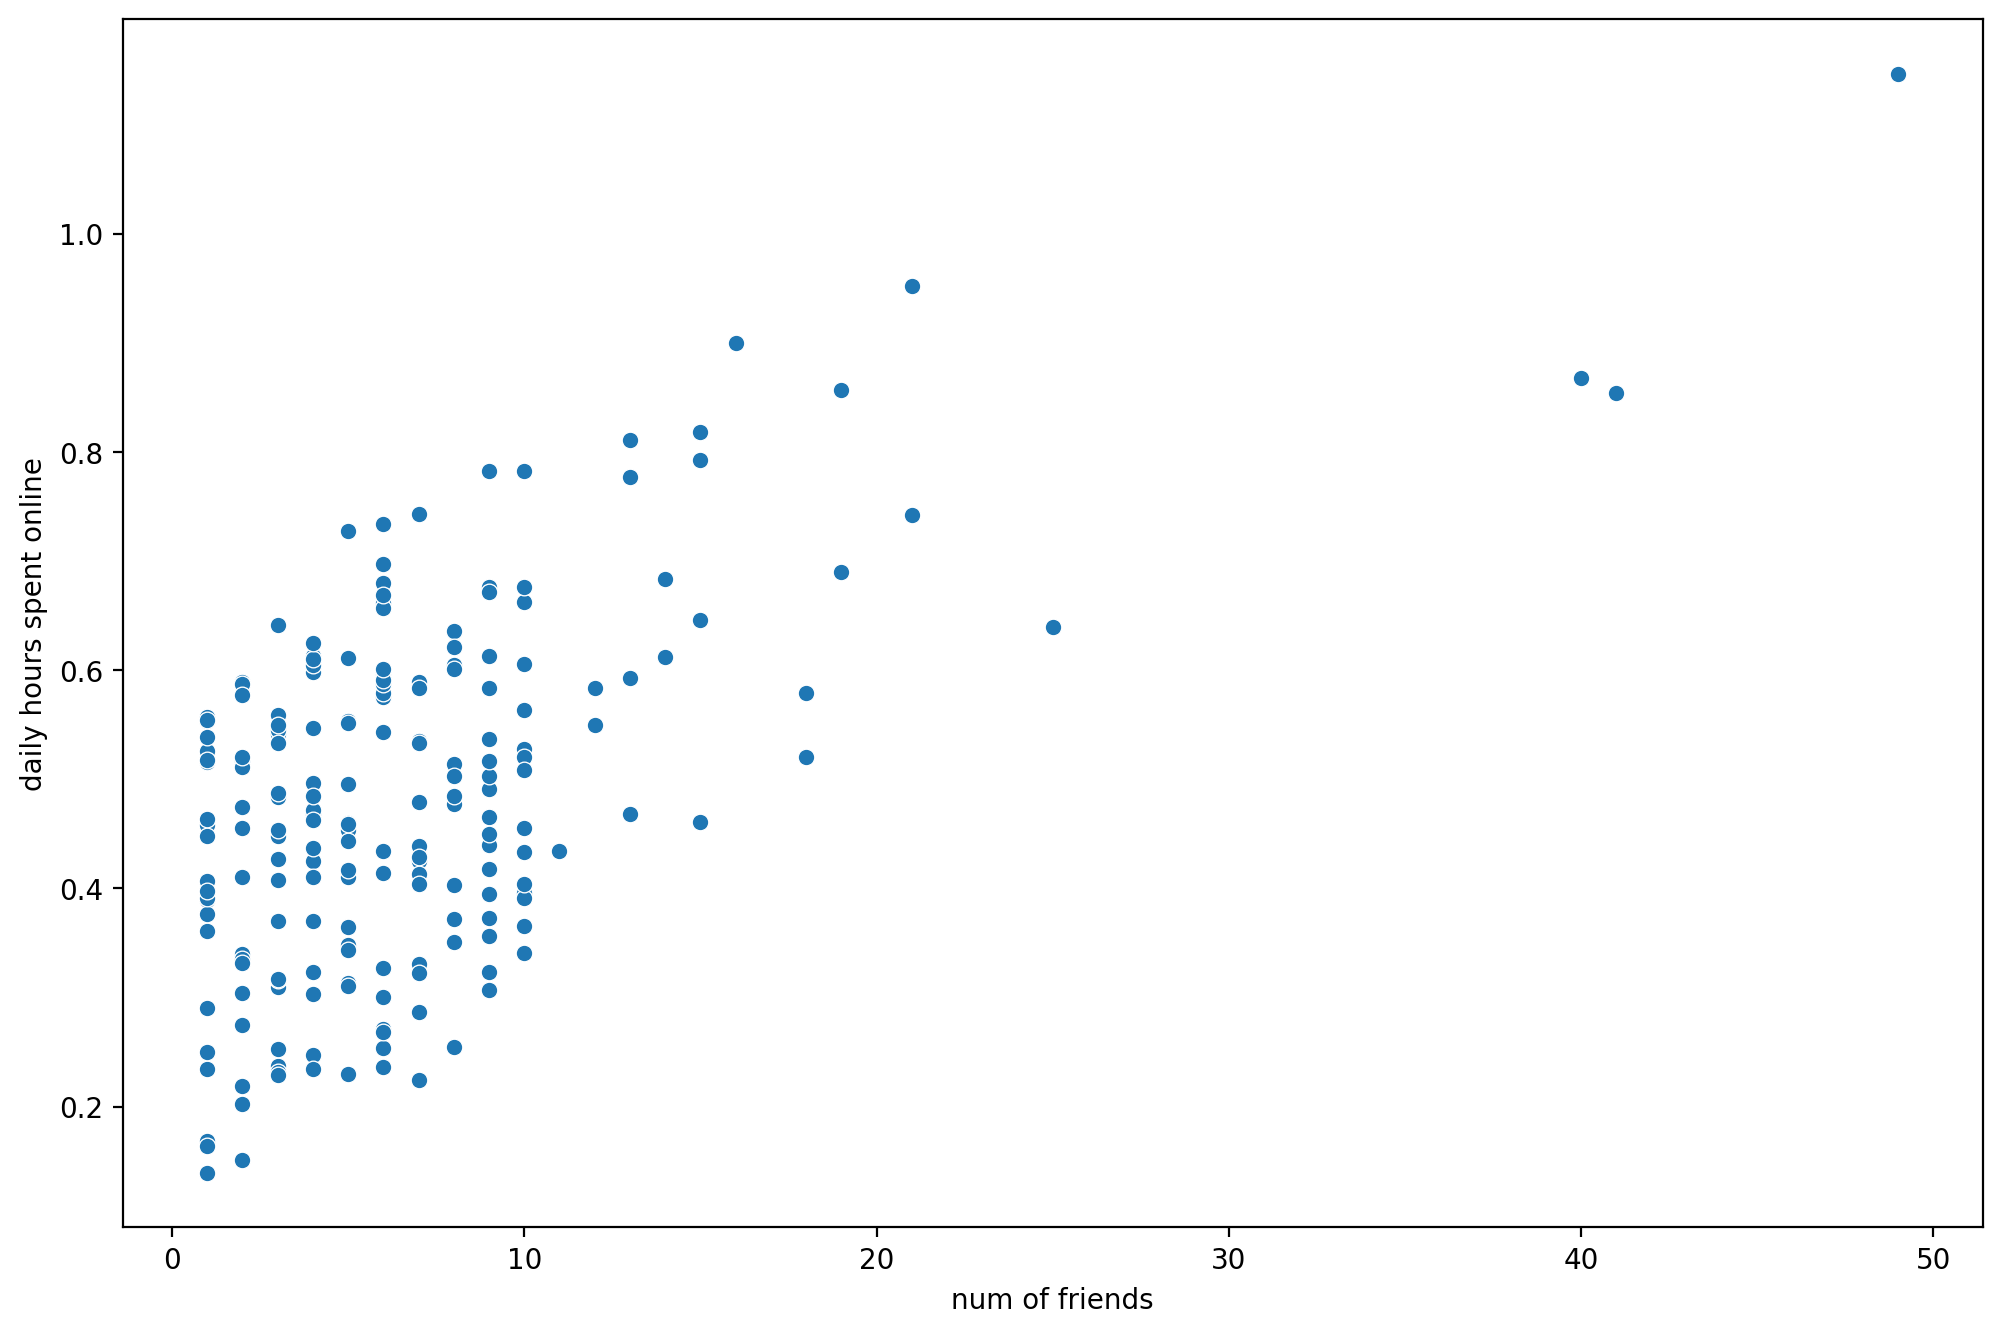

In [86]:
ax = sns.scatterplot(x=num_friends_good, y = daily_hours_good)
ax.set(xlabel = 'num of friends', ylabel = 'daily hours spent online')
plt.show()

### <font color = 'yellow'> See that one dot far off... that is an outlier 

## <font color = 'aqua'>Simpson's Paradox

Data conclusion can be derived from the same data set depending upon the modality of distribution chosen. 

<font color ='brown'> Correlation is not causation. Only through randomised trials the above statement should be confirmed.